In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

TO SCREEN:
- XGBoost
- Random Forest
- Decision Tree
- Bagging
- LightGBM
- SVM
- KNN
- Naive Bayes
- Logistic Regression
- BaseModel

EVALUATION TO DO:
- Confusion Matrix
- Accuracy
- F1 Score
- Sensitivity
- Specificity
- ROC Curve
- ROC AUC score

In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def evaluate_model(actual, predicted, class_proba):
    cm = confusion_matrix(y_true = actual, y_pred = predicted)
    acc = accuracy_score(y_true = actual, y_pred = predicted) 
    f1 = f1_score(y_true = actual, y_pred = predicted)
    sensitivity = recall_score(y_true = actual, y_pred = predicted)
    specificity = precision_score(y_true = actual, y_pred = predicted)
    fpr, tpr, threshold = roc_curve(actual, class_proba)
    roc_auc = auc(fpr, tpr)

    return cm, acc, f1, sensitivity, specificity, fpr, tpr, roc_auc

In [3]:
def summarize_evaluation(cm, acc, f1, sensitivity, specificity, fpr, tpr, roc_auc):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot = True, fmt="d")
    plt.title('Confusion Matrix')
    plt.show()
    print("Accuracy reached on test data:", acc)
    print("F1 score reached on test data:", f1)
    print("Sensitivity reached on test data:", sensitivity)
    print("Specificity reached on test data:", specificity)
    plt.figure(figsize=(8, 6))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv("marketing_campaign.csv", sep = ";")
X = data.drop("Response", axis=1)
y = data["Response"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2115)

In [6]:
from sklearn.base import BaseEstimator, TransformerMixin
class YearFromDtTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Assuming X is a DataFrame and "Dt_Customer" is one of its columns
        year_column = X["Dt_Customer"].str[:4].astype(int)
        return year_column.values.reshape(-1, 1)
    
class RemoveDumbYearBirth(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        self.median_year_birth = X["Year_Birth"].median().astype(int)
        return self
    
    def transform(self, X):
        X.loc[X["Year_Birth"]<1930, "Year_Birth"] = self.median_year_birth
        return X["Year_Birth"].values.reshape(-1, 1)
    
class RemoveDumbIncome(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        self.median_income = X["Income"].median().astype(int)
        return self
    
    def transform(self, X):
        X.loc[X["Income"]>200000, "Income"] = self.median_income
        return X["Income"].values.reshape(-1, 1)

In [7]:
categories = {
        'education': X_train['Education'].unique(),
        'martial_status': X_train['Marital_Status'].unique(),
        'kidhome': X_train["Kidhome"].unique(),
        'teenhome': X_train["Teenhome"].unique(),
        'acceptedcmp1': X_train["AcceptedCmp1"].unique(),
        'acceptedcmp2': X_train["AcceptedCmp2"].unique(),
        'acceptedcmp3': X_train["AcceptedCmp3"].unique(),
        'acceptedcmp4': X_train["AcceptedCmp4"].unique(),
        'acceptedcmp5': X_train["AcceptedCmp5"].unique()
    }

In [8]:
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import numpy as np

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('column_dropper', 'drop', ["ID", "Z_CostContact", "Z_Revenue"]),
        ('year_dt', YearFromDtTransformer(), ["Dt_Customer"]),
        ('dumb_year_birth', RemoveDumbYearBirth(), ["Year_Birth"]),
        ('dumb_income', RemoveDumbIncome(), ["Income"]),
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import pickle
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import sklearn.naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline

### Dummy Classifier

c:\Users\pawel\.conda\envs\BHL9\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


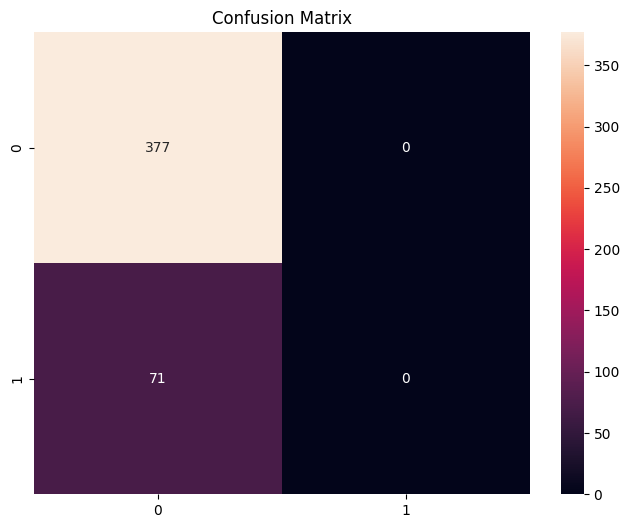

Accuracy reached on test data: 0.8415178571428571
F1 score reached on test data: 0.0
Sensitivity reached on test data: 0.0
Specificity reached on test data: 0.0


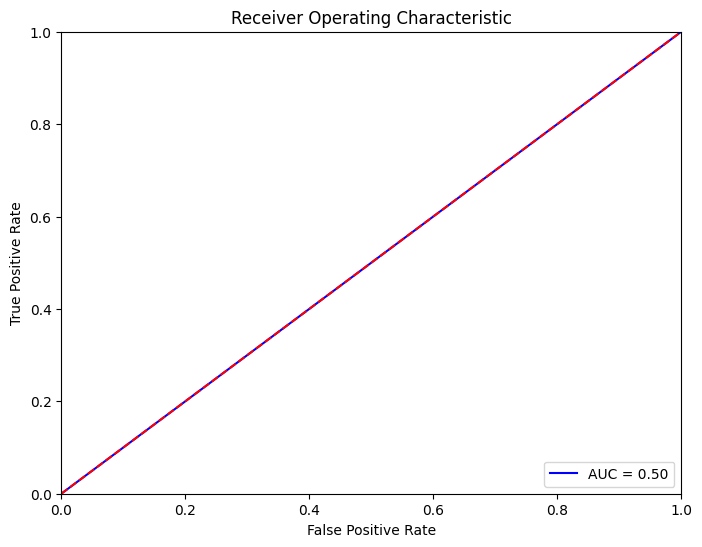

In [11]:
dummy = Pipeline(
    steps=[("preprocessor", preprocessor), ('imputer', SimpleImputer(strategy="median")), ("adasyn", ADASYN()), ("classifier", DummyClassifier())]
)
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)
class_probabilities = dummy.predict_proba(X_test)
dummy_proba = class_probabilities[:, 1]
dummy_cm, dummy_acc, dummy_f1, dummy_sensitivity, dummy_specificity, dummy_fpr, dummy_tpr, dummy_roc_auc = evaluate_model(y_test, dummy_pred, dummy_proba)
summarize_evaluation(dummy_cm, dummy_acc, dummy_f1, dummy_sensitivity, dummy_specificity, dummy_fpr, dummy_tpr, dummy_roc_auc)

### XGBoost

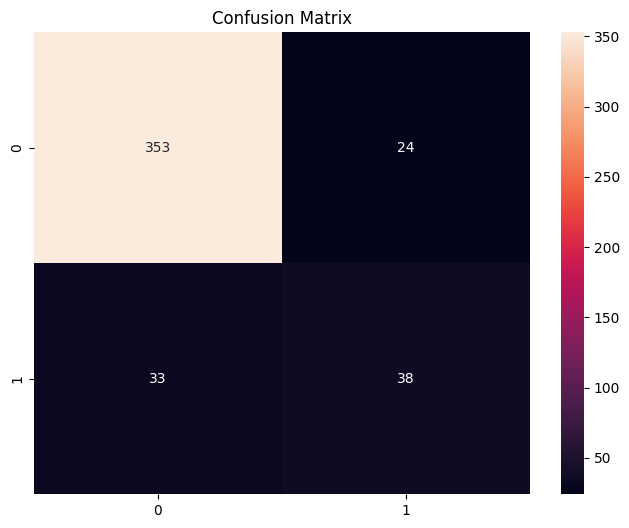

Accuracy reached on test data: 0.8727678571428571
F1 score reached on test data: 0.5714285714285714
Sensitivity reached on test data: 0.5352112676056338
Specificity reached on test data: 0.6129032258064516


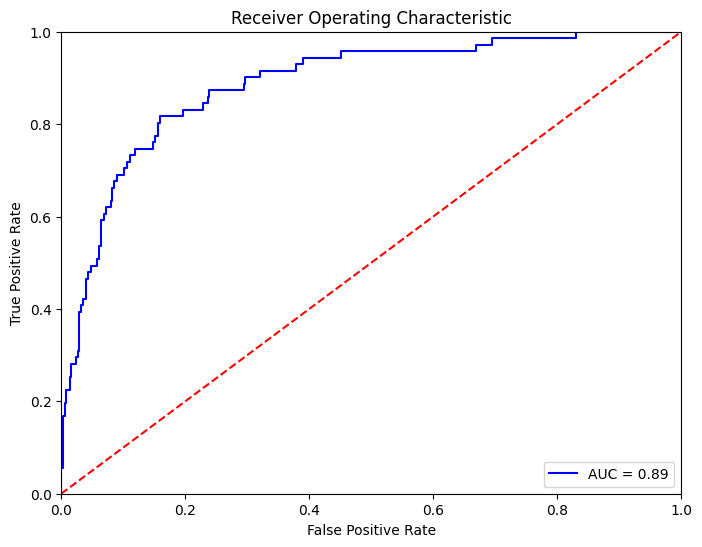

In [12]:
xgb_model = Pipeline(
    steps=[("preprocessor", preprocessor), ('imputer', SimpleImputer(strategy="median")), ("adasyn", ADASYN()), ("classifier", xgb.XGBClassifier(random_state = 2115))]
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
class_probabilities = xgb_model.predict_proba(X_test)
xgb_proba = class_probabilities[:, 1]
xgb_cm, xgb_acc, xgb_f1, xgb_sensitivity, xgb_specificity, xgb_fpr, xgb_tpr, xgb_roc_auc = evaluate_model(y_test, xgb_pred, xgb_proba)
summarize_evaluation(xgb_cm, xgb_acc, xgb_f1, xgb_sensitivity, xgb_specificity, xgb_fpr, xgb_tpr, xgb_roc_auc)

### Random Forest

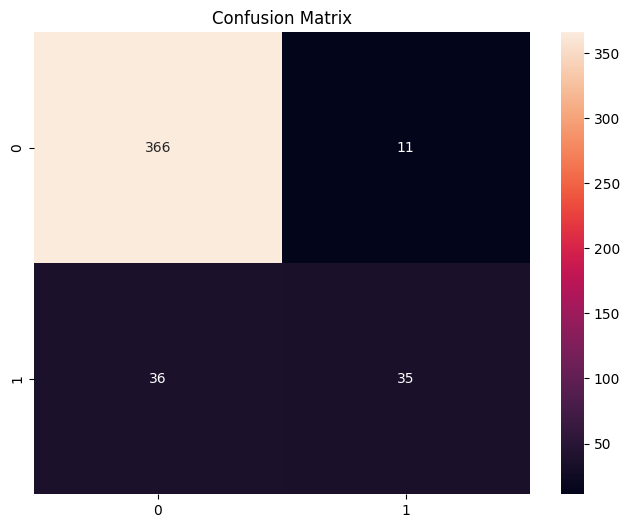

Accuracy reached on test data: 0.8950892857142857
F1 score reached on test data: 0.5982905982905983
Sensitivity reached on test data: 0.49295774647887325
Specificity reached on test data: 0.7608695652173914


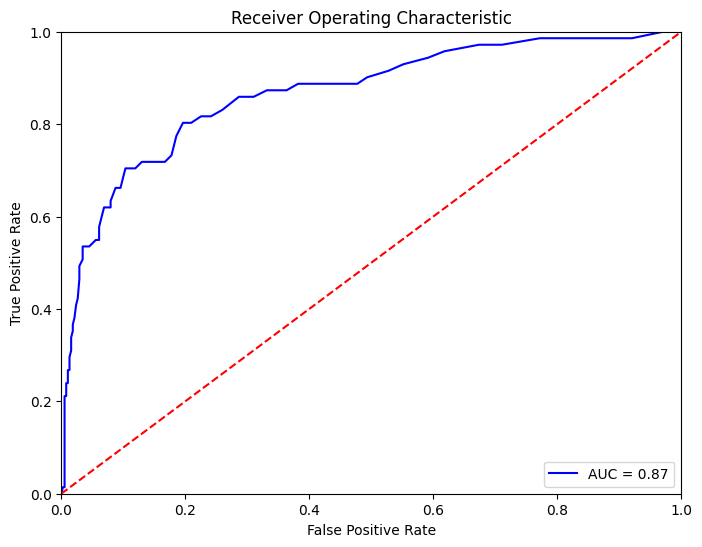

In [13]:
rf = Pipeline(
    steps=[("preprocessor", preprocessor), ('imputer', SimpleImputer(strategy="median")), ("adasyn", ADASYN()), ("classifier", RandomForestClassifier(random_state = 2115))]
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
class_probabilities = rf.predict_proba(X_test)
rf_proba = class_probabilities[:, 1]
rf_cm, rf_acc, rf_f1, rf_sensitivity, rf_specificity, rf_fpr, rf_tpr, rf_roc_auc = evaluate_model(y_test, rf_pred, rf_proba)
summarize_evaluation(rf_cm, rf_acc, rf_f1, rf_sensitivity, rf_specificity, rf_fpr, rf_tpr, rf_roc_auc)

### Decision Tree

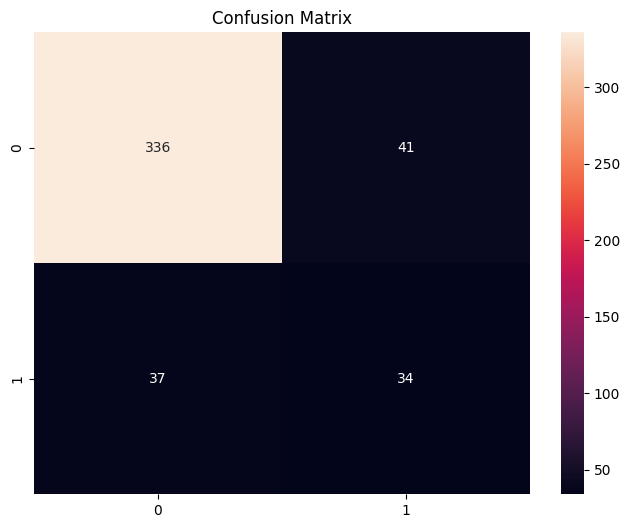

Accuracy reached on test data: 0.8258928571428571
F1 score reached on test data: 0.4657534246575342
Sensitivity reached on test data: 0.4788732394366197
Specificity reached on test data: 0.4533333333333333


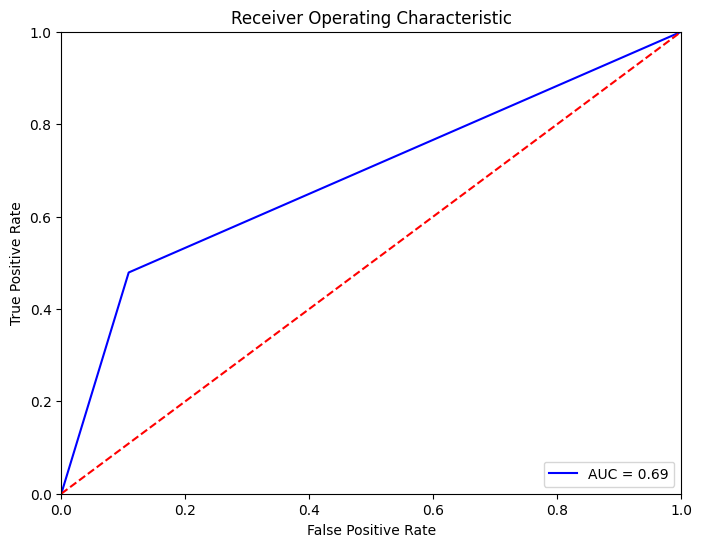

In [14]:
dt = Pipeline(
    steps=[("preprocessor", preprocessor), ('imputer', SimpleImputer(strategy="median")), ("adasyn", ADASYN()), ("classifier", DecisionTreeClassifier(random_state = 2115))]
)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
class_probabilities = dt.predict_proba(X_test)
dt_proba = class_probabilities[:, 1]
dt_cm, dt_acc, dt_f1, dt_sensitivity, dt_specificity, dt_fpr, dt_tpr, dt_roc_auc = evaluate_model(y_test, dt_pred, dt_proba)
summarize_evaluation(dt_cm, dt_acc, dt_f1, dt_sensitivity, dt_specificity, dt_fpr, dt_tpr, dt_roc_auc)

### Bagging

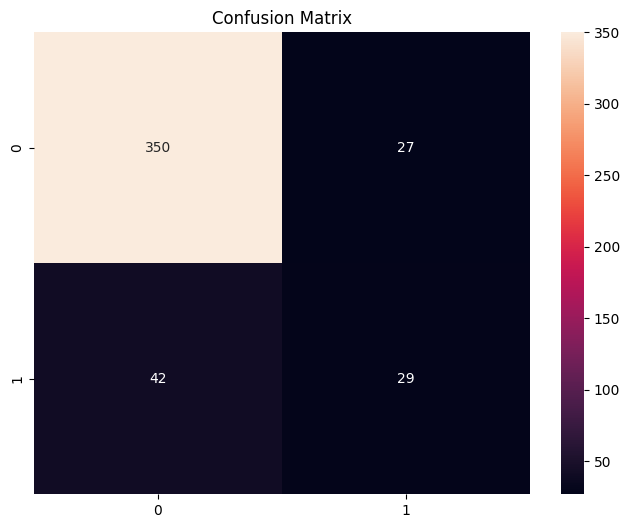

Accuracy reached on test data: 0.8459821428571429
F1 score reached on test data: 0.4566929133858268
Sensitivity reached on test data: 0.4084507042253521
Specificity reached on test data: 0.5178571428571429


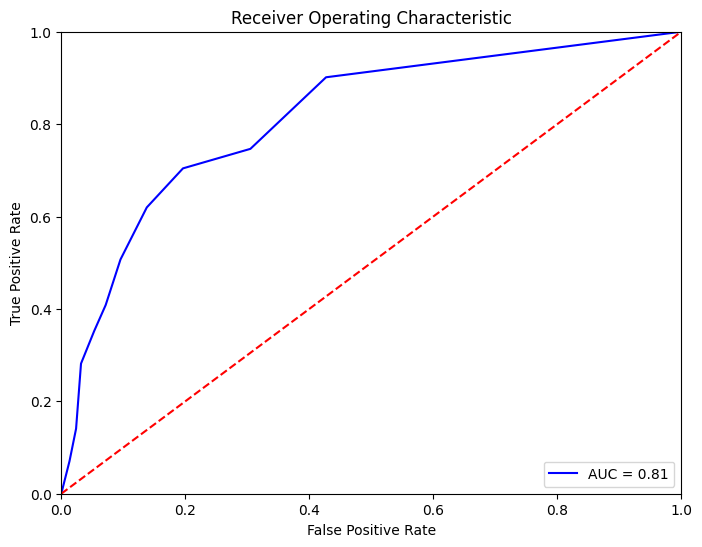

In [15]:
bg = Pipeline(
    steps=[("preprocessor", preprocessor), ('imputer', SimpleImputer(strategy="median")), ("adasyn", ADASYN()), ("classifier", BaggingClassifier(random_state = 2115))]
)
bg.fit(X_train, y_train)
bg_pred = bg.predict(X_test)
class_probabilities = bg.predict_proba(X_test)
bg_proba = class_probabilities[:, 1]
bg_cm, bg_acc, bg_f1, bg_sensitivity, bg_specificity, bg_fpr, bg_tpr, bg_roc_auc = evaluate_model(y_test, bg_pred, bg_proba)
summarize_evaluation(bg_cm, bg_acc, bg_f1, bg_sensitivity, bg_specificity, bg_fpr, bg_tpr, bg_roc_auc)

### LightGBM

In [16]:
gbm = Pipeline(
    steps=[("preprocessor", preprocessor), ('imputer', SimpleImputer(strategy="median")), ("adasyn", ADASYN()), ("classifier", LGBMClassifier(random_state = 2115))]
)
gbm.fit(X_train, y_train)
gbm_pred = gbm.predict(X_test)
class_probabilities = gbm.predict_proba(X_test)
gbm_proba = class_probabilities[:, 1]
gbm_cm, gbm_acc, gbm_f1, gbm_sensitivity, gbm_specificity, gbm_fpr, gbm_tpr, gbm_roc_auc = evaluate_model(y_test, gbm_pred, gbm_proba)
summarize_evaluation(gbm_cm, gbm_acc, gbm_f1, gbm_sensitivity, gbm_specificity, gbm_fpr, gbm_tpr, gbm_roc_auc)

: 

### SVM

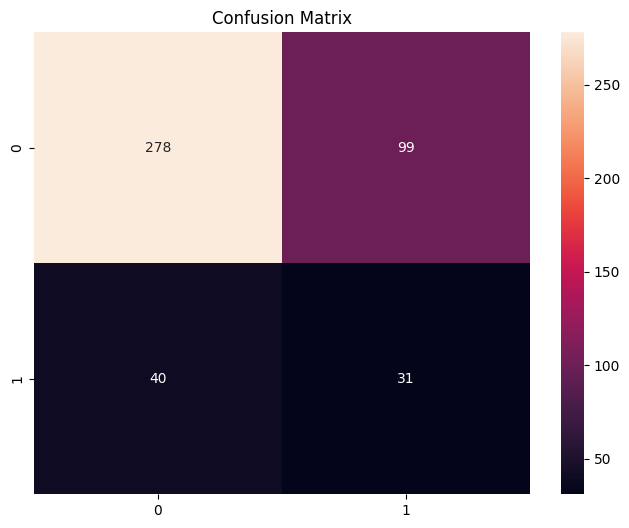

Accuracy reached on test data: 0.6897321428571429
F1 score reached on test data: 0.30845771144278605
Sensitivity reached on test data: 0.43661971830985913
Specificity reached on test data: 0.23846153846153847


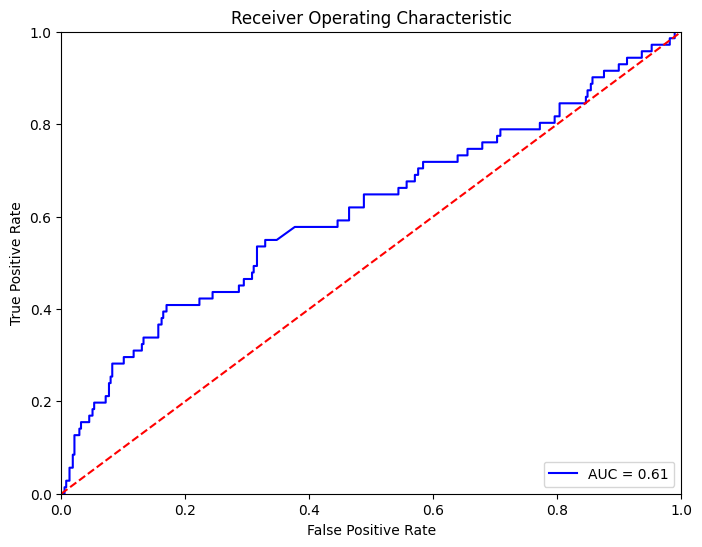

In [17]:
svc = Pipeline(
    steps=[("preprocessor", preprocessor), ('imputer', SimpleImputer(strategy="median")), ("adasyn", ADASYN()), ("classifier", SVC(random_state = 2115, kernel = "poly", probability=True))]
)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
class_probabilities = svc.predict_proba(X_test)
svc_proba = class_probabilities[:, 1]
svc_cm, svc_acc, svc_f1, svc_sensitivity, svc_specificity, svc_fpr, svc_tpr, svc_roc_auc = evaluate_model(y_test, svc_pred, svc_proba)
summarize_evaluation(svc_cm, svc_acc, svc_f1, svc_sensitivity, svc_specificity, svc_fpr, svc_tpr, svc_roc_auc)

### KNN

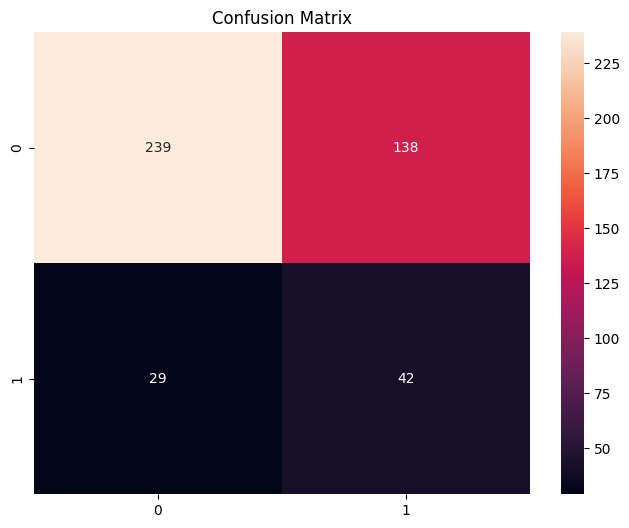

Accuracy reached on test data: 0.6272321428571429
F1 score reached on test data: 0.3346613545816733
Sensitivity reached on test data: 0.5915492957746479
Specificity reached on test data: 0.23333333333333334


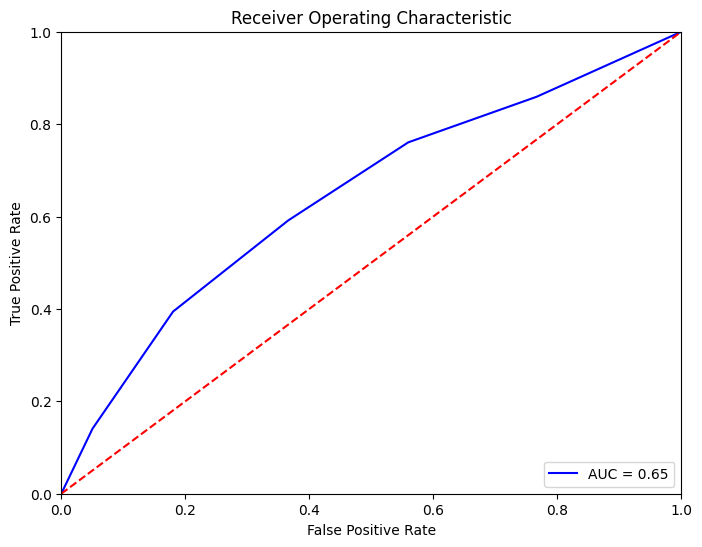

In [18]:
knn = Pipeline(
    steps=[("preprocessor", preprocessor), ('imputer', SimpleImputer(strategy="median")), ("adasyn", ADASYN()), ("classifier", KNeighborsClassifier())]
)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
class_probabilities = knn.predict_proba(X_test)
knn_proba = class_probabilities[:, 1]
knn_cm, knn_acc, knn_f1, knn_sensitivity, knn_specificity, knn_fpr, knn_tpr, knn_roc_auc = evaluate_model(y_test, knn_pred, knn_proba)
summarize_evaluation(knn_cm, knn_acc, knn_f1, knn_sensitivity, knn_specificity, knn_fpr, knn_tpr, knn_roc_auc)

### Naive Bayes

In [22]:
nb = Pipeline(
    steps=[("preprocessor", preprocessor), ('imputer', SimpleImputer(strategy="median")), ("adasyn", ADASYN()), ("classifier", sklearn.naive_bayes.GaussianNB())]
)
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
class_probabilities = nb.predict_proba(X_test)
nb_proba = class_probabilities[:, 1]
nb_cm, nb_acc, nb_f1, nb_sensitivity, nb_specificity, nb_fpr, nb_tpr, nb_roc_auc = evaluate_model(y_test, nb_pred, nb_proba)
summarize_evaluation(nb_cm, nb_acc, nb_f1, nb_sensitivity, nb_specificity, nb_fpr, nb_tpr, nb_roc_auc)

TypeError: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.

### Logistic Regression

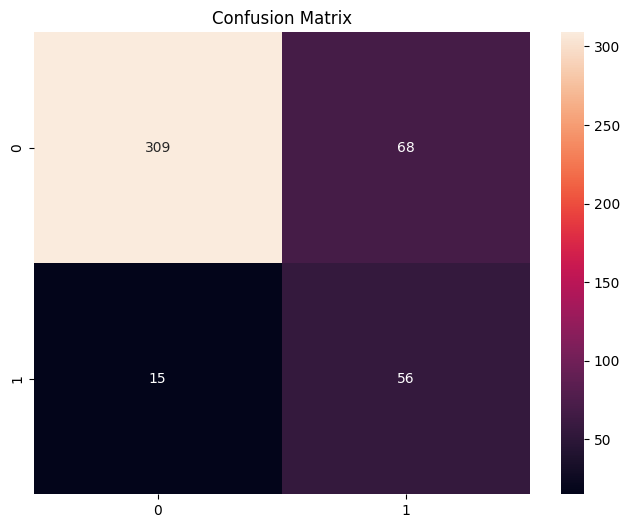

Accuracy reached on test data: 0.8147321428571429
F1 score reached on test data: 0.5743589743589743
Sensitivity reached on test data: 0.7887323943661971
Specificity reached on test data: 0.45161290322580644


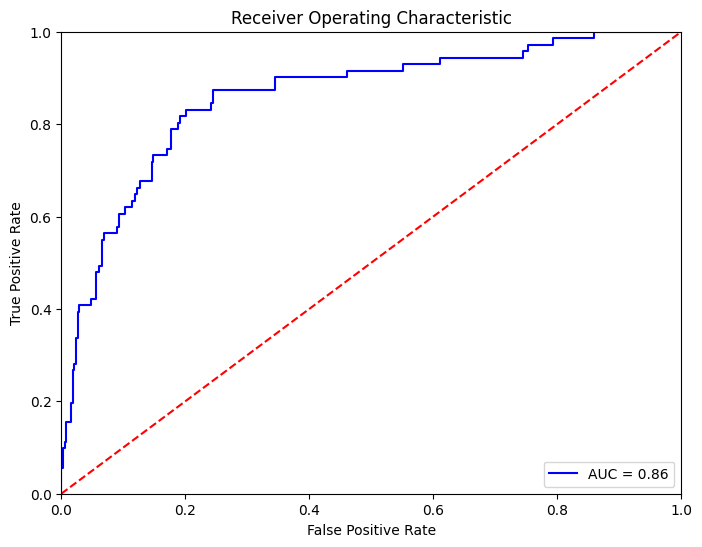

In [26]:
lr = Pipeline(
    steps=[("preprocessor", preprocessor), ('imputer', SimpleImputer(strategy="median")), ("adasyn", ADASYN()), ("classifier", LogisticRegression(random_state = 2115, max_iter=1000, solver = "liblinear"))]
)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
class_probabilities = lr.predict_proba(X_test)
lr_proba = class_probabilities[:, 1]
lr_cm, lr_acc, lr_f1, lr_sensitivity, lr_specificity, lr_fpr, lr_tpr, lr_roc_auc = evaluate_model(y_test, lr_pred, lr_proba)
summarize_evaluation(lr_cm, lr_acc, lr_f1, lr_sensitivity, lr_specificity, lr_fpr, lr_tpr, lr_roc_auc)

### Model summary

In [29]:
dummy_sum = [dummy_acc, dummy_f1, dummy_sensitivity, dummy_specificity]
rf_sum = [rf_acc, rf_f1, rf_sensitivity, rf_specificity]
xgb_sum = [xgb_acc, xgb_f1, xgb_sensitivity, xgb_specificity]
bg_sum = [bg_acc, bg_f1, bg_sensitivity, bg_specificity]
#gbm_sum = [gbm_acc, gbm_f1, gbm_sensitivity, gbm_specificity]
svc_sum = [svc_acc, svc_f1, svc_sensitivity, svc_specificity]
knn_sum = [knn_acc, knn_f1, knn_sensitivity, knn_specificity]
#nb_sum = [nb_acc, nb_f1, nb_sensitivity, nb_specificity]
lr_sum = [lr_acc, lr_f1, lr_sensitivity, lr_specificity]
dt_sum = [dt_acc, dt_f1, dt_sensitivity, dt_specificity]

In [20]:
"""acc_sum = [dummy_acc, rf_acc, xgb_acc, bg_acc]
f1_sum = [dummy_f1, rf_f1, xgb_f1, bg_f1]"""

'acc_sum = [dummy_acc, rf_acc, xgb_acc, bg_acc]\nf1_sum = [dummy_f1, rf_f1, xgb_f1, bg_f1]'

In [30]:
summary_df = pd.DataFrame([dummy_sum, xgb_sum, rf_sum, dt_sum, bg_sum, svc_sum, knn_sum, lr_sum], index=["Dummy Model", "XGBoost", "Random Forest", "Decidsion Tree", "Bagging", "SVC", "KNN", "LogisticRegression"], columns=["Accuracy", "F1 score", "Sensitivity", "Specificity"])

In [31]:
summary_df.round(3)

,Accuracy,F1 score,Sensitivity,Specificity
Dummy Model,0.842,0.000,0.000,0.000
XGBoost,0.873,0.571,0.535,0.613
Random Forest,0.895,0.598,0.493,0.761
Decidsion Tree,0.826,0.466,0.479,0.453
Bagging,0.846,0.457,0.408,0.518
SVC,0.690,0.308,0.437,0.238
KNN,0.627,0.335,0.592,0.233
LogisticRegression,0.815,0.574,0.789,0.452


### Best performing models in terms of sensitivity (excluding Base Model):
 - Logistic Regression (0.789)
 - and XGBoost looks good overall and was trained in another notebook



### Let's tune hyperparameters of best performing model

In [43]:
max_iter = np.arange(100, 1500, 1)
solver = ['liblinear']
warm_start = [True, False]
C = np.arange(0, 1, 0.01)
max_iter = np.arange(100, 1500, 1)
solver = ['liblinear']
C = np.arange(0, 1, 0.01)

random_grid ={
    'classifier__max_iter' : max_iter,
    'classifier__solver' : solver,
    'classifier__warm_start': warm_start,
    'classifier__C' : C
}

lr = Pipeline(
    steps=[("preprocessor", preprocessor), ('imputer', SimpleImputer(strategy="median")), ("adasyn", ADASYN()), 
           ("classifier", LogisticRegression(random_state = 2115))]
)

lr_model = RandomizedSearchCV(estimator = lr,
                                   param_distributions = random_grid,
                                   n_iter = 25,
                                   scoring = 'recall',
                                   verbose = 2, 
                                   cv = 5,
                                   random_state = 42,
                                  )

lr_model.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END classifier__C=0.43, classifier__max_iter=879, classifier__solver=liblinear, classifier__warm_start=True; total time=   0.0s
[CV] END classifier__C=0.43, classifier__max_iter=879, classifier__solver=liblinear, classifier__warm_start=True; total time=   0.0s
[CV] END classifier__C=0.43, classifier__max_iter=879, classifier__solver=liblinear, classifier__warm_start=True; total time=   0.0s
[CV] END classifier__C=0.43, classifier__max_iter=879, classifier__solver=liblinear, classifier__warm_start=True; total time=   0.0s
[CV] END classifier__C=0.43, classifier__max_iter=879, classifier__solver=liblinear, classifier__warm_start=True; total time=   0.0s
[CV] END classifier__C=0.52, classifier__max_iter=733, classifier__solver=liblinear, classifier__warm_start=False; total time=   0.0s
[CV] END classifier__C=0.52, classifier__max_iter=733, classifier__solver=liblinear, classifier__warm_start=False; total time=   0.0s
[CV] 

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('column_dropper',
                                                                               'drop',
                                                                               ['ID',
                                                                                'Z_CostContact',
                                                                                'Z_Revenue']),
                                                                              ('year_dt',
                                                                               YearFromDtTransformer(),
                                                                               ['Dt_Customer']),
                                                                              ('dumb_year_birth',
                                                                               RemoveDumbYearBirth(),
                                                                               ['Year_Birth']),
                                                                              ('dumb_income',
                                                                               RemoveDumbIncome(),
                                                                               ['Income']),
                                                                              ('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                Si...
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                                        'classifier__max_iter': array([ 100,  101,  102, ..., 1497, 1498, 1499]),
                                        'classifier__solver': ['liblinear'],
                                        'classifier__warm_start': [True,
                                                                   False]},
                   random_state=42, scoring='recall', verbose=2)

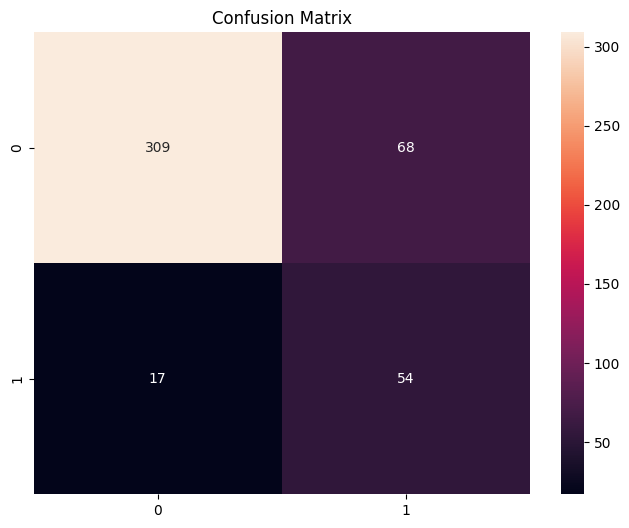

Accuracy reached on test data: 0.8102678571428571
F1 score reached on test data: 0.5595854922279793
Sensitivity reached on test data: 0.7605633802816901
Specificity reached on test data: 0.4426229508196721


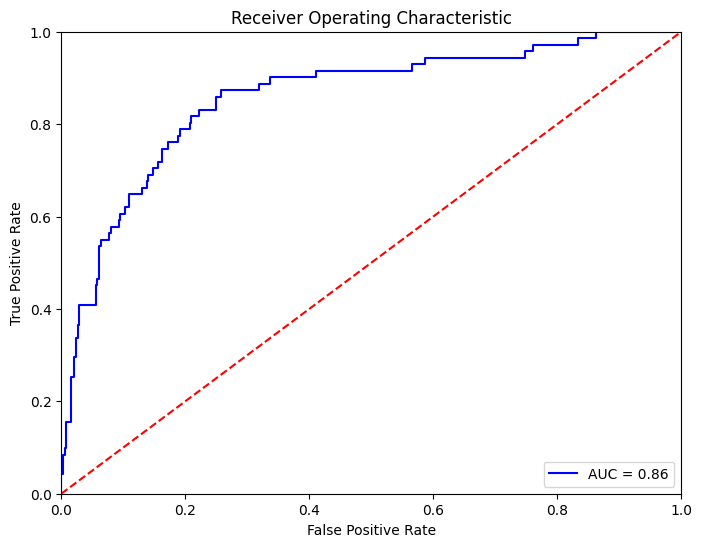

In [44]:
lr_pred = lr_model.predict(X_test)
class_probabilities = lr_model.predict_proba(X_test)
lr_proba = class_probabilities[:, 1]
lr_cm, lr_acc, lr_f1, lr_sensitivity, lr_specificity, lr_fpr, lr_tpr, lr_roc_auc = evaluate_model(y_test, lr_pred, lr_proba)
summarize_evaluation(lr_cm, lr_acc, lr_f1, lr_sensitivity, lr_specificity, lr_fpr, lr_tpr, lr_roc_auc)

In [45]:
pickle.dump(lr_model, open('models/lr.pkl','wb'))

### XGBoost

In [9]:
from GPyOpt.methods import BayesianOptimization
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import xgboost as xgb

In [23]:
precision_score(y_test, xgb_pred)

0.6744186046511628

In [24]:
xgb_cm

array([[281,  14],
       [ 32,  29]], dtype=int64)

In [25]:
true_negative = 29
false_positive = 16
true_negative/(true_negative+false_positive)

0.6444444444444445

In [10]:
def xgb_cv_score(parameters): #scoring function for the model
    parameters = parameters[0]
    score = cross_val_score(
            xgb.XGBClassifier(
                max_depth=int(parameters[0]),
                min_child_weight=int(parameters[1]),
                subsample=parameters[2],
                colsample_bytree=parameters[3],
                n_estimators=int(parameters[4]),
                learning_rate=parameters[5]),
            X_train, y_train, scoring=make_scorer(accuracy_score), cv=5).mean()
    return score

baysian_opt_bounds = [
	{'name': 'max_depth', 'type': 'discrete', 'domain': (3, 10, 5, 15)},
	{'name': 'min_child_weight', 'type': 'discrete', 'domain': (1, 5, 10)},
	{'name': 'subsample', 'type': 'continuous', 'domain': (0.5, 1.0)},
	{'name': 'colsample_bytree', 'type': 'continuous', 'domain': (0.5, 1.0)},
	{'name': 'n_estimators', 'type': 'discrete', 'domain': (100, 200, 300, 400)},
	{'name': 'learning_rate', 'type': 'continuous', 'domain': (0.01, 0.2)}
    ]
optimizer = BayesianOptimization(
	f=xgb_cv_score, domain=baysian_opt_bounds, model_type='GP',
	acquisition_type='EI', max_iter=25
    )
optimizer.run_optimization()
best_params_bayesian = optimizer.x_opt #getting best params
params_bayesian_opt = {
	'max_depth': int(best_params_bayesian[0]),
	'min_child_weight': int(best_params_bayesian[1]),
	'subsample': best_params_bayesian[2],
	'colsample_bytree': best_params_bayesian[3],
	'n_estimators': int(best_params_bayesian[4]),
	'learning_rate': best_params_bayesian[5]
    } #setting a dict of best params
# Initialize and train the model
xgb_model = xgb.XGBClassifier(**params_bayesian_opt, random_state = 2115) 
xgb_model.fit(X_train, y_train) #training


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5916139132088578, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.022342976470501437,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=2115, ...)

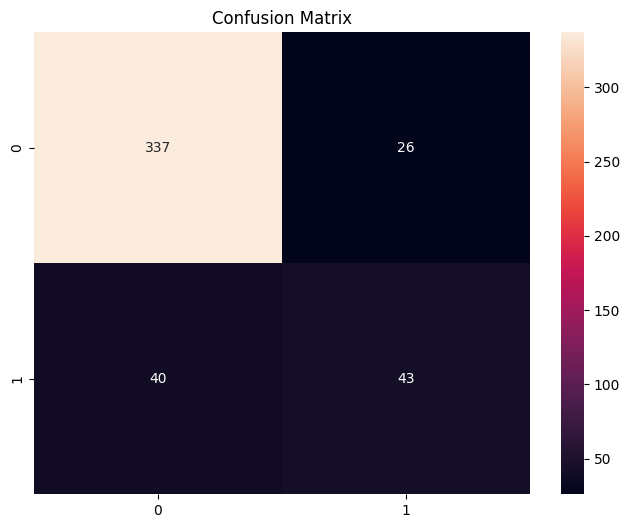

Accuracy reached on test data: 0.852017937219731
F1 score reached on test data: 0.5657894736842105
Sensitivity reached on test data: 0.5180722891566265
Specificity reached on test data: 0.6231884057971014


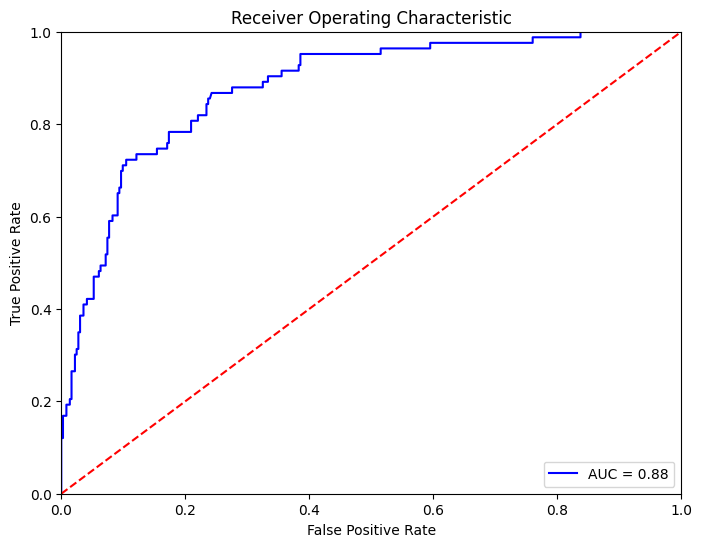

In [11]:
xgb_pred = xgb_model.predict(X_test)
class_probabilities = xgb_model.predict_proba(X_test)
xgb_proba = class_probabilities[:, 1]
xgb_cm, xgb_acc, xgb_f1, xgb_sensitivity, xgb_specificity, xgb_fpr, xgb_tpr, xgb_roc_auc = evaluate_model(y_test, xgb_pred, xgb_proba)
summarize_evaluation(xgb_cm, xgb_acc, xgb_f1, xgb_sensitivity, xgb_specificity, xgb_fpr, xgb_tpr, xgb_roc_auc)

### Random Forest

In [19]:
def rf_cv_score(parameters): #scoring function for the model
    parameters = parameters[0]
    score = cross_val_score(
            RandomForestClassifier(
                n_estimators=int(parameters[0]),
                max_depth=int(parameters[1]),
                min_samples_split=parameters[2],
                min_samples_leaf=parameters[3],
                max_features=int(parameters[4])),
            X_train, y_train, scoring=make_scorer(accuracy_score), cv=5).mean()
    return score


bayesian_opt_bounds = [
    {'name': 'n_estimators', 'type': 'discrete', 'domain': (100, 200, 300, 400)},
    {'name': 'max_depth', 'type': 'discrete', 'domain': (None, 10, 20, 30, 40, 50)},
    {'name': 'min_samples_split', 'type': 'discrete', 'domain': (int(2), int(5), int(10))},
    {'name': 'min_samples_leaf', 'type': 'discrete', 'domain': (int(1), int(2), int(4))},
    {'name': 'max_features', 'type': 'discrete', 'domain': (None, "sqrt", "log2")},
]

optimizer = BayesianOptimization(
	f=rf_cv_score, domain=baysian_opt_bounds, model_type='GP',
	acquisition_type='EI', max_iter=25
    )
optimizer.run_optimization()
best_params_bayesian = optimizer.x_opt #getting best params
params_bayesian_opt = {
	'n_estimators': int(best_params_bayesian[0]),
	'max_depth': int(best_params_bayesian[1]),
	'min_samples_split': best_params_bayesian[2],
	'min_samples_leaf': best_params_bayesian[3],
	'max_features': int(best_params_bayesian[4]),
    } #setting a dict of best params
# Initialize and train the model
rf_bay = RandomForestClassifier(**params_bayesian_opt) 
rf_bay.fit(X_train, y_train) #training


RandomForestClassifier(max_depth=1, max_features=100,
                       min_samples_leaf=0.6692114808616797,
                       min_samples_split=0.9759706874274975, n_estimators=5)

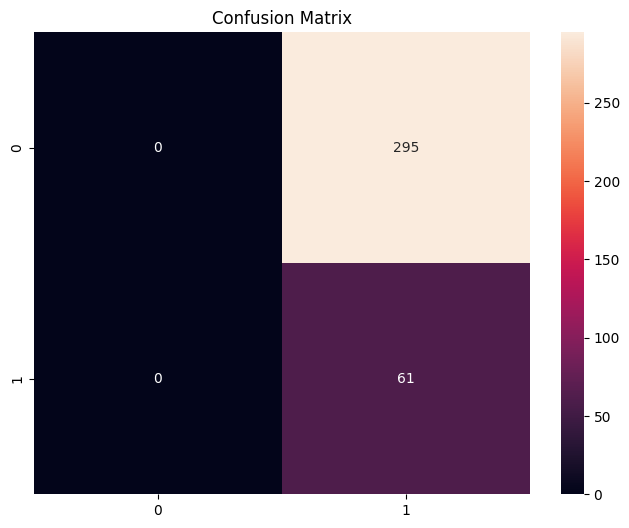

Accuracy reached on test data: 0.17134831460674158
F1 score reached on test data: 0.29256594724220625
Sensitivity reached on test data: 1.0
Specificity reached on test data: 0.17134831460674158


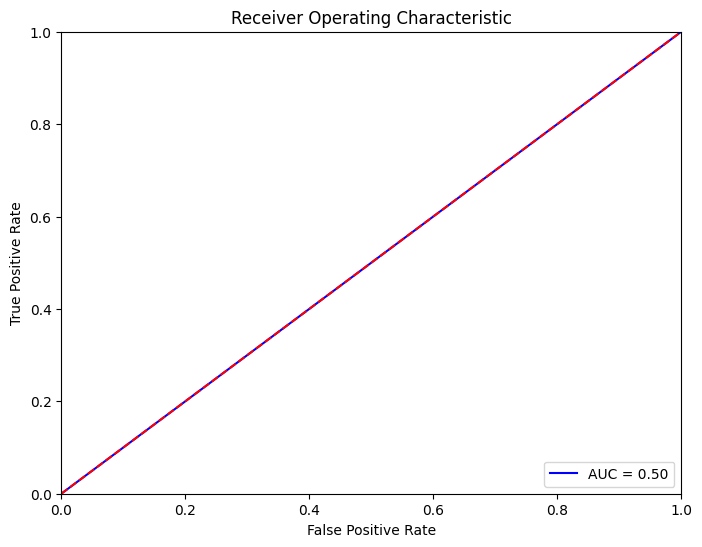

In [20]:
rf_pred_bay = rf_bay.predict(X_test)
class_probabilities = rf_bay.predict_proba(X_test)
rf_bay_proba = class_probabilities[:, 1]
rf_bay_cm, rf_bay_acc, rf_bay_f1, rf_bay_sensitivity, rf_bay_specificity, rf_bay_fpr, rf_bay_tpr, rf_bay_roc_auc = evaluate_model(y_test, rf_pred_bay, rf_bay_proba)
summarize_evaluation(rf_bay_cm, rf_bay_acc, rf_bay_f1, rf_bay_sensitivity, rf_bay_specificity, rf_bay_fpr, rf_bay_tpr, rf_bay_roc_auc)

In [21]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
rf = RandomForestClassifier(random_state = 2115)
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 15, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 25, cv = 5, verbose=2, random_state=42, n_jobs = 5, scoring = "f1")
rf_random.fit(X_train, y_train.values)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2115),
                   n_iter=25, n_jobs=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 7, 10, 12, 15,
                                                      None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=2)

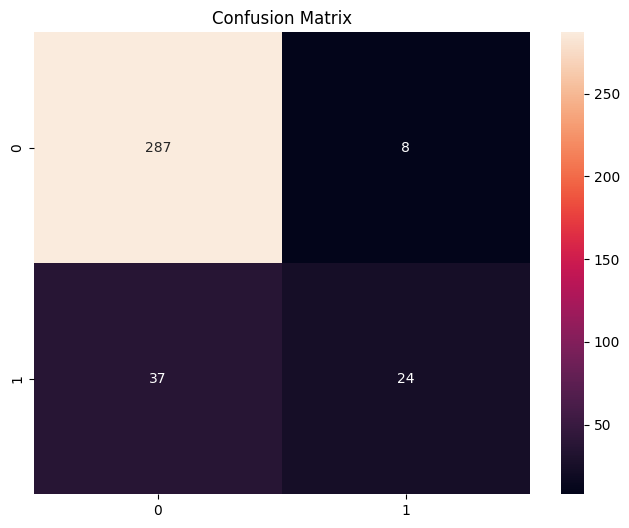

Accuracy reached on test data: 0.8735955056179775
F1 score reached on test data: 0.5161290322580645
Sensitivity reached on test data: 0.39344262295081966
Specificity reached on test data: 0.75


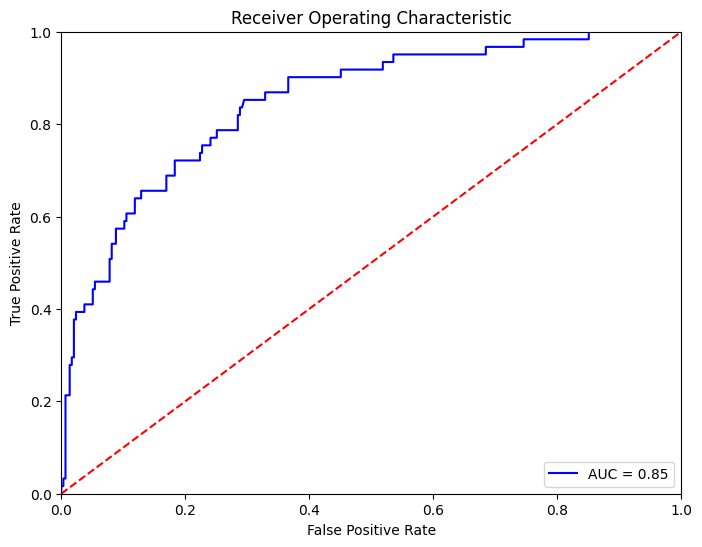

In [22]:
rf_pred_bay = rf_random.predict(X_test)
class_probabilities = rf_random.predict_proba(X_test)
rf_bay_proba = class_probabilities[:, 1]
rf_bay_cm, rf_bay_acc, rf_bay_f1, rf_bay_sensitivity, rf_bay_specificity, rf_bay_fpr, rf_bay_tpr, rf_bay_roc_auc = evaluate_model(y_test, rf_pred_bay, rf_bay_proba)
summarize_evaluation(rf_bay_cm, rf_bay_acc, rf_bay_f1, rf_bay_sensitivity, rf_bay_specificity, rf_bay_fpr, rf_bay_tpr, rf_bay_roc_auc)

In [15]:
pickle.dump(rf_random, open('models/rf1.pkl','wb'))